In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

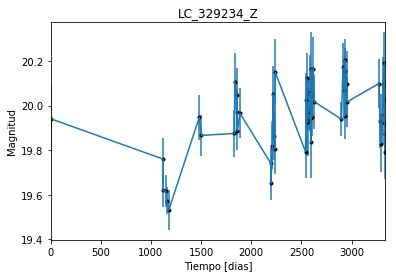

In [2]:
data = np.genfromtxt('LC_329234_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_329234_Z')
plt.savefig("LC_329234_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

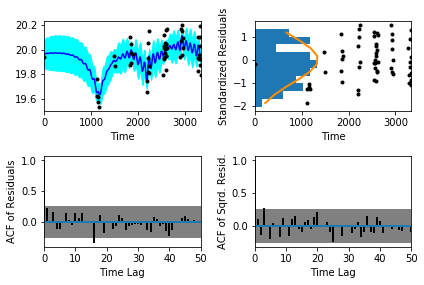

In [5]:
sample.assess_fit()

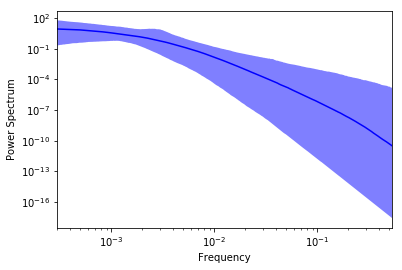

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

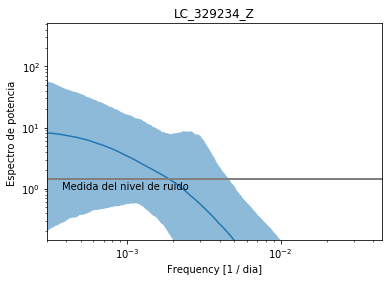

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_329234_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_329234_Z')

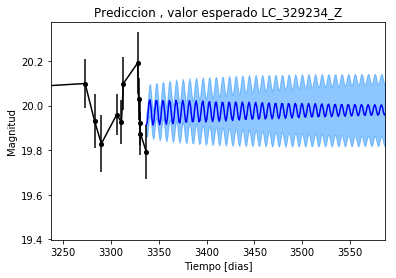

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_329234_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_329234_Z')

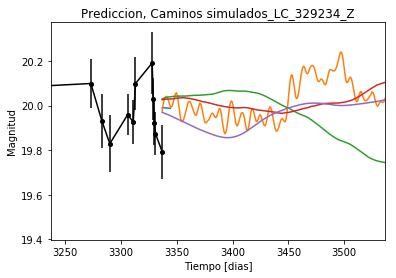

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_329234_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


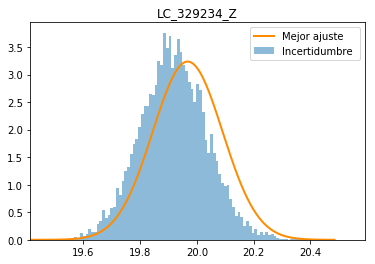

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_329234_Z')
plt.savefig("Mejor_ajuste_LC_329234_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_329234_Z')

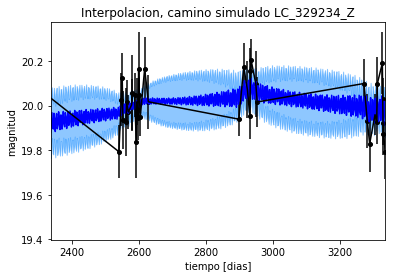

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_329234_Z')

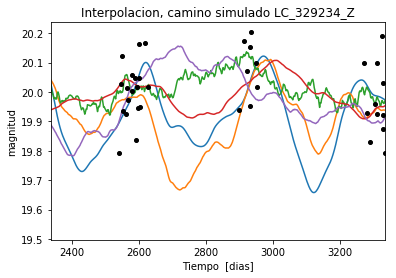

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1101.24984948
Median: 0.00975342963109
Standard deviation: 0.19079857618
68% credibility interval: [ 0.00092303  0.17843568]
95% credibility interval: [  3.52279349e-04   7.28870799e-01]
99% credibility interval: [  3.07724815e-04   1.01544913e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1094.1039702
Median: 0.00253269060109
Standard deviation: 0.0952078589166
68% credibility interval: [ 0.00053099  0.03544454]
95% credibility interval: [ 0.0003188   0.30825385]
99% credibility interval: [  3.03233854e-04   6.66344575e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 444.877634634
Median: 0.0174584561773
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1316.72677209
Median: 67.0726038078
Standard deviation: 1.53532835037
68% credibility interval: [ 65.39031569  68.08506225]
95% credibility interval: [ 62.95414756  68.67263253]
99% credibility interval: [ 60.74574169  70.64862258]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 240.668957605
Median: 0.654735099008
Standard deviation: 2.40081295091
68% credibility interval: [ 0.06334277  4.12321266]
95% credibility interval: [ 0.01626052  8.73919959]
99% credibility interval: [  1.05244276e-02   1.07039041e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 420.198425328
Median: 0.58356319453
Standard deviation: 10.2060078832
68% credibility interval: [  0.01800217  11.69302293]
95% credibility interval: [  1.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1445.60463858
Median: 1.09696010647e-36
Standard deviation: 2.65097176172e+107
68% credibility interval: [  1.00810552e-81   3.65976625e-07]
95% credibility interval: [  6.11311968e-118   1.07095032e+083]
99% credibility interval: [  6.94870203e-143   6.24561222e+104]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1727.79175861
Median: 19.8989499016
Standard deviation: 0.0829794880487
68% credibility interval: [ 19.82445977  19.96488107]
95% credibility interval: [ 19.72690421  20.05915954]
99% credibility interval: [ 19.63036698  20.14597567]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 614.338685369
Median: 0.0162058270676
Standard deviation: 0.263694759526
68% credibility interval: [ 0.          0.41235387]
95% credibility interval: [ 0.          0.93062214]
99% credibility interval: [ 0.          1.05048285]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 614.338685369
Median: 0.0162058270676
Standard deviation: 0.263694759526
68% credibility interval: [ 0.          0.41235387]
95% credibility interval: [ 0.          0.93062214]
99% credibility interval: [ 0.          1.05048285]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 746.572012984
Median: 0.0
Standard deviation: 0.000957170189317
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1316.72677209
Median: 67.0726038078
Standard deviation: 1.53532835037
68% credibility interval: [ 65.39031569  68.08506225]
95% credibility interval: [ 62.95414756  68.67263253]
99% credibility interval: [ 60.74574169  70.64862258]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3240.8429375
Median: 0.0262358406527
Standard deviation: 0.0313049591624
68% credibility interval: [ 0.01503844  0.04887054]
95% credibility interval: [ 0.0094573   0.10422499]
99% credibility interval: [ 0.00701597  0.19384469]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2327.28250431
Median: 0.951157588676
Standard deviation: 0.145928601606
68% credibility interval: [ 0.82780655  1.10713281]
95% credibility interval: [ 0.72152395  1.29955156]
99% credibility interval: [ 0.66335757  1.43037965]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 596.803930391
Median: 0.000205964679124
Standard deviation: 0.204067218941
68% credibility interval: [  3.23611970e-07   1.23981310e-02]
95% credibility interval: [  5.82020499e-86   4.88856898e-01]
99% credibility interval: [  4.78387155e-107   1.28138253e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1101.24984948
Median: (-0.0612826057527+0j)
Standard deviation: 2.04506845499
68% credibility interval: [-1.12114443+0.j         -0.00579958-3.59257745j]
95% credibility interval: [ -4.57963030e+00+0.j          -2.21343643e-03-0.02228313j]
99% credibility interval: [ -6.38025504e+00+0.j          -1.93349203e-03-0.02077936j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1094.1039702
Median: (-0.0159133643724+0j)
Standard deviation: 1.76152842953
68% credibility interval: [-0.22270458+0.j         -0.00333629+0.26263075j]
95% credibility interval: [-1.93681604+3.4683996j  -0.00200311+0.05424639j]
99% credibility interval: [ -4.18676644e+00+4.70711707j  -1.90527450e-03+0.j        ]
Posterior summary for parameter ar_root